In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('exams.csv')
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,associate's degree,standard,none,49,45,45
1,male,group C,high school,free/reduced,none,50,41,35
2,male,group C,some high school,standard,completed,61,70,64
3,female,group C,bachelor's degree,standard,none,66,73,69
4,male,group C,some college,standard,completed,59,53,57


In [3]:
df = Data.copy()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,associate's degree,standard,none,49,45,45
1,male,group C,high school,free/reduced,none,50,41,35
2,male,group C,some high school,standard,completed,61,70,64
3,female,group C,bachelor's degree,standard,none,66,73,69
4,male,group C,some college,standard,completed,59,53,57
...,...,...,...,...,...,...,...,...
995,female,group D,high school,free/reduced,none,46,64,59
996,male,group C,some high school,free/reduced,none,72,74,68
997,female,group D,bachelor's degree,standard,none,50,58,53
998,female,group A,associate's degree,standard,none,55,55,63


### Data Cleaning

#### Encording Categorical Datasets

In [4]:
df['race/ethnicity']=df['race/ethnicity'].str.split(' ').str[1]
df1 = pd.DataFrame()

In [6]:
male = pd.get_dummies(df['gender'],drop_first=True)
standard = pd.get_dummies(df['lunch'],drop_first=True)
none = pd.get_dummies(df['test preparation course'],drop_first=True)
def EdLevel(x):
    if x=='high school':
        return 1
    elif x == 'some high school':
        return 2
    elif x == 'some college':
        return 3
    elif x== "associate's degree":
        return 4
    elif x == "bachelor's degree":
        return 5
    else:
        return 6
def race(x):
    if x=='A':
        return 1
    elif x == 'B':
        return 2
    elif x == 'C':
        return 3
    elif x== "D":
        return 4
    else:
        return 5

In [7]:
# Features
Features = ['Gender(male)', 'lunch(standard)', 'TestPreparation(none)','ParentEdLevel', 'Race(group)']

df1=pd.concat([df1,male,standard,none],axis=1)
df1['race']=df['race/ethnicity'].apply(race)
df1['ParentEdLevel'] = df['parental level of education'].apply(EdLevel)

maths_label=pd.cut(df['math score'],bins=[0,49,59,69,79,100],labels=[5,4,3,2,1])
reading_label = pd.cut(df['reading score'],bins=[0,49,59,69,79,100],labels=[5,4,3,2,1])
writing_label = pd.cut(df['writing score'],bins=[0,49,59,69,79,100],labels=[5,4,3,2,1])

# Labeling the scores
df1['maths_label']=maths_label
df1['writing_label']=writing_label
df1['reading_label']=reading_label

df1 = pd.concat([df1,df[['math score','writing score','reading score']]],axis=1)
df1.rename(columns={'male':'Gender(male)','standard':'lunch(standard)','none':'TestPreparation(none)','race':'Race(group)'},inplace=True)

## How effective is the test preparation course?

In [8]:
df['test preparation course'].value_counts(normalize=True)*100

none         66.2
completed    33.8
Name: test preparation course, dtype: float64

In [9]:
TestPreparationCourse = df.groupby(by=['test preparation course'])[['math score','reading score','writing score']]
TestPreparationCourse.describe().unstack()

                      test preparation course
math score     count  completed                  338.000000
                      none                       662.000000
               mean   completed                   69.644970
                      none                        65.545317
               std    completed                   14.804101
                      none                        14.799320
               min    completed                   19.000000
                      none                         6.000000
               25%    completed                   59.000000
                      none                        55.000000
               50%    completed                   70.000000
                      none                        66.000000
               75%    completed                   80.000000
                      none                        76.000000
               max    completed                  100.000000
                      none                       100.0

In [10]:
none = df[df['test preparation course']=='none'][['math score','reading score','writing score']]
Completed = df[df['test preparation course']=='completed'][['math score','reading score','writing score']]

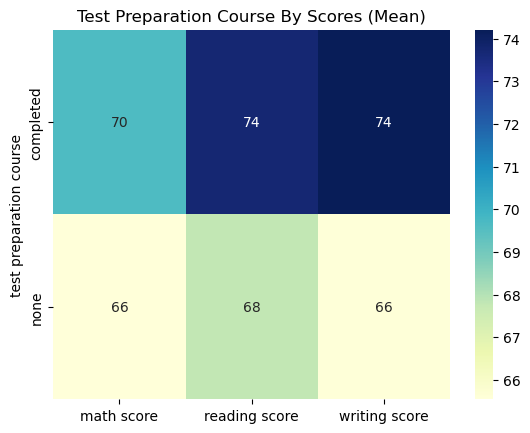

In [11]:
TestPreparationCourseMean = df.groupby(by=['test preparation course'])[['math score','reading score','writing score']].mean()
sns.heatmap(TestPreparationCourseMean,annot=True,cmap="YlGnBu",)
plt.title('Test Preparation Course By Scores (Mean)')
plt.show()

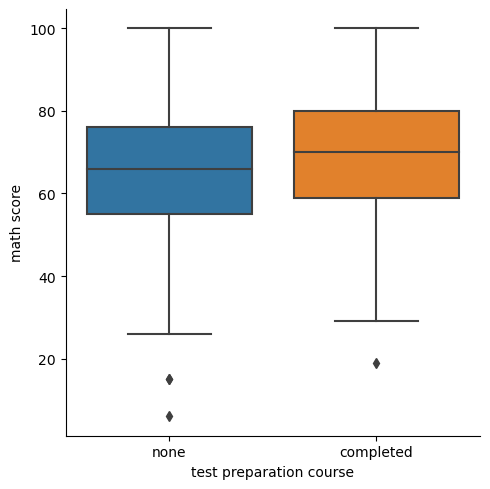

In [12]:
sns.catplot(y='math score',x = 'test preparation course',data=df,kind = 'box')

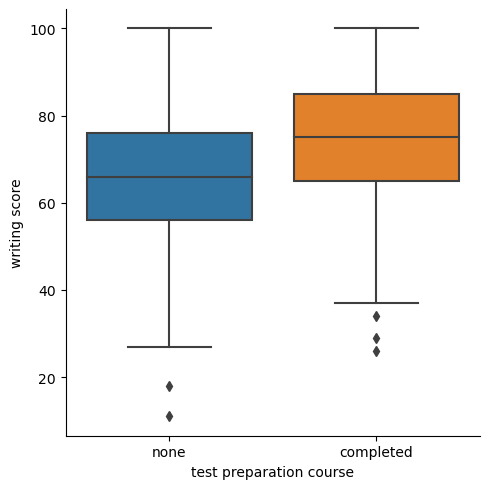

In [13]:
sns.catplot(y='writing score',x = 'test preparation course',data=df,kind = 'box')

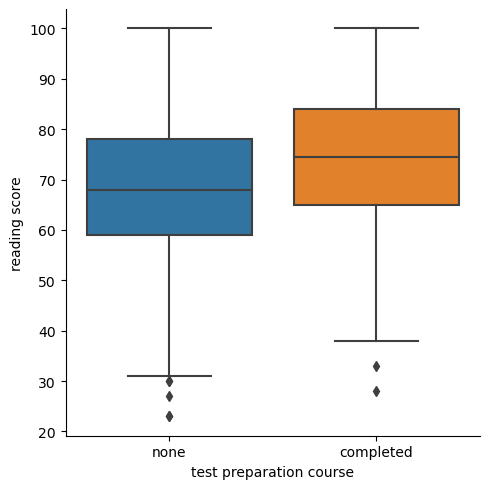

In [14]:
sns.catplot(y='reading score',x = 'test preparation course',data=df,kind = 'box')

In [15]:
from scipy import stats
Mathstest_statistic,Mathsp_value = stats.ttest_ind(Completed['math score'],none['math score'],equal_var=False)
Writingtest_statistic,Writingp_value = stats.ttest_ind(Completed['writing score'],none['writing score'],equal_var=False)
Readingtest_statistic,Readingp_value = stats.ttest_ind(Completed['reading score'],none['reading score'],equal_var=False)

In [16]:
Statistics_Table = pd.DataFrame({'p_values':[Mathsp_value,Writingp_value,Readingp_value],'test_statistics':[Mathstest_statistic,Writingtest_statistic,Readingtest_statistic],'Conclusion':['Difference','Difference','Difference']},index=['Maths Scores','Writing Scores','Reading Scores'])
Statistics_Table

,p_values,test_statistics,Conclusion
Maths Scores,3.863429e-05,4.142856,Difference
Writing Scores,2.894948e-18,8.973775,Difference
Reading Scores,5.403894e-10,6.300125,Difference


#### Conclusion
<p> 1. <b>Statistical Significance</b>: The p-value is far below the common significance level threshold (e.g., 0.05),we rejects the null hypothesis and hence there is statistically significant difference in scores between those who completed the test preparation course and those who did not. </p>
    <p> 2. <b>Effectiveness of the Test Preparation Course</b> : This result strongly suggests that the test preparation course has a significant impact on the students' scores. Students who participated in the course tend to perform differently (most likely better) than those who did not.</p>

## Which major factor contributed to the test Outcomes?

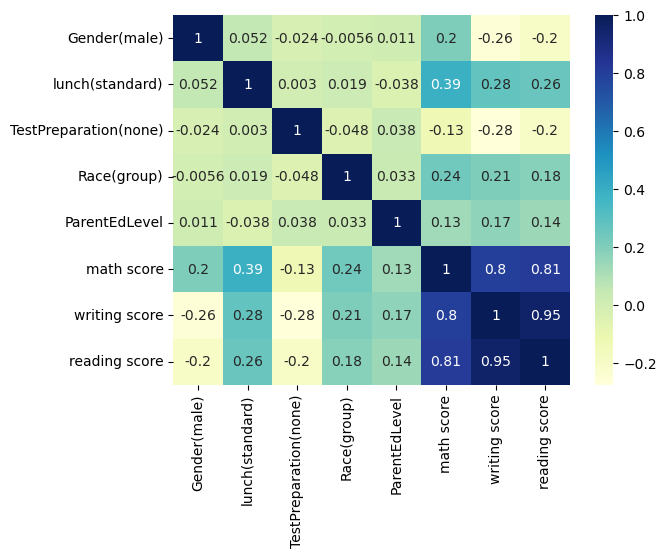

In [17]:
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")
plt.show()

This table represents the correlation matrix for the given variables. Each value in the matrix indicates the strength and direction of the relationship between two variables, ranging from -1 to 1.

### Interpretation of the Correlation Matrix:

1. **Gender(male)**:
   - Positively correlated with math score (0.204466): Males tend to have slightly higher math scores.
   - Negatively correlated with writing score (-0.255793) and reading score (-0.201530): Males tend to have slightly lower writing and reading scores.
   
2. **Lunch(standard)**:
   - Positively correlated with math score (0.390092), writing score (0.275526), and reading score (0.261299): Students who have standard lunch tend to perform better in all three subjects.
   
3. **Test Preparation(none)**:
   - Negatively correlated with math score (-0.130040), writing score (-0.275105), and reading score (-0.196856): Students who do not take test preparation courses tend to score lower in all three subjects.
   
4. **Race(group)**:
   - Positively correlated with math score (0.240455), writing score (0.207679), and reading score (0.183738): Certain racial groups tend to perform better in all three subjects.
   
5. **ParentEdLevel**:
   - Positively correlated with math score (0.128489), writing score (0.170409), and reading score (0.139870): Higher parental education levels are associated with better performance in all three subjects.
   
6. **Math Score**:
   - Strongly positively correlated with writing score (0.799968) and reading score (0.811056): Students who perform well in math also tend to perform well in writing and reading.
   
7. **Writing Score**:
   - Very strongly positively correlated with reading score (0.950427): Students who perform well in writing also tend to perform well in reading.

### Summary:
- The highest correlations are seen between the different subject scores, indicating that students who perform well in one subject tend to perform well in the others.
- Standard lunch and certain racial groups show moderate positive correlations with higher scores in all subjects.
- Test preparation has a negative correlation, indicating that students not taking test preparation tend to score lower.
- Gender shows a small positive correlation with math scores but a negative correlation with writing and reading scores.


In [18]:
from scipy.stats import bartlett
F_statistic,pvalue = bartlett(*df1.corr().values)
pvalue

0.9301978658312732

### Interpretation:
- **Null Hypothesis (H0)**: The variables are uncorrelated (the correlation matrix is an identity matrix).
- **Alternative Hypothesis (H1)**: The variables are correlated (the correlation matrix is not an identity matrix).

### P-value:
- **P-value = 0.9301978658312732**: This p-value is very high and well above the common significance level of 0.05.

### Conclusion:
- Since the p-value is much greater than 0.05, we fail to reject the null hypothesis.
- This means that there is not enough evidence to suggest that the variables are correlated.
- In other words, Bartlett's test indicates that the correlation matrix is close to an identity matrix, implying that the variables are likely uncorrelated.

Therefore, based on Bartlett's test of sphericity, we conclude that the variables in your dataset are not significantly correlated. This suggests that the data does not have sufficient inter-correlations to be suitable for methods that require correlated variables, such as factor analysis or principal component analysis (PCA).

In [19]:
import statsmodels.formula.api as stf
df_Analysis = df1.copy()
df_Analysis.rename(columns={'Gender(male)':'Gender', 'lunch(standard)':'lunch', 'TestPreparation(none)':'TestPreparation','Race(group)':'Race','writing score':'write_score','reading score':'read_score','math score':'maths_score'},inplace=True)
def Linear_Regression(y):
    model = stf.ols(formula='{}~Gender+lunch+TestPreparation+ParentEdLevel+Race'.format(y),data=df_Analysis).fit()
    return model.summary()

#### Maths Score

In [20]:
Linear_Regression('maths_score')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            maths_score   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     74.86
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.27e-66
Time:                        14:29:10   Log-Likelihood:                -3961.4
No. Observations:                1000   AIC:                             7935.
Df Residuals:                     994   BIC:                             7964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.6232      1.681     27.139      0.000      42.324      48.922
Gender              5.4142      0.808      6.703      0.000       3.829       6.999
lunch              11.9005      0.844     14.101      0.000      10.244      13.557
TestPreparation    -3.8269      0.854     -4.480      0.000      -5.503      -2.151
ParentEdLevel       1.3716      0.269      5.103      0.000       0.844       1.899
Race                2.9399      0.356      8.263      0.000       2.242       3.638
==============================================================================
Omnibus:                       15.117   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.469
Skew:                          -0.304   Prob(JB):                     0.000437
Kurtosis:                       3.046   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Summary for Maths Score

R-squared: 0.274 - This indicates that approximately 27.4% of the variance in `maths_score` can be explained by the independent variables in the model.
Prob (F-statistic): 1.27e-66 - This is the p-value for the F-statistic. The extremely low p-value (< 0.05) indicates that the model is statistically significant.
 
#### Coefficients and Significance
Intercept: 45.6232 (p < 0.001)- The intercept represents the expected `maths_score` when all independent variables are zero.
  
Gender: 5.4142 (p < 0.001)- Gender(Male) is associated with an increase of 5.4142 points in `maths_score`.
  
Lunch: 11.9005 (p < 0.001)- Having lunch(Standard) is associated with an increase of 11.9005 points in `maths_score`.
  
Test Preparation: -3.8269 (p < 0.001) - Not completing Test Preparation is associated with a decrease of 3.8269 points in `maths_score`.
  
Parent Education Level: 1.3716 (p < 0.001)- Each level increase in parent education level is associated with an increase of 1.3716 points in `maths_score`.
  
Race: 2.9399 (p < 0.001)- The coefficient for race indicates that certain racial categories are associated with an increase of 2.9399 points in `maths_score`.
  
**This indicates that intercept and lunch has the most positive impact on the maths scores**

#### Write Score

In [21]:
Linear_Regression('write_score')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            write_score   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     85.07
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.78e-74
Time:                        14:29:11   Log-Likelihood:                -3937.9
No. Observations:                1000   AIC:                             7888.
Df Residuals:                     994   BIC:                             7917.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          59.4513      1.642     36.204      0.000      56.229      62.674
Gender             -8.2742      0.789    -10.487      0.000      -9.823      -6.726
lunch               9.1266      0.824     11.071      0.000       7.509      10.744
TestPreparation    -8.8194      0.834    -10.570      0.000     -10.457      -7.182
ParentEdLevel       1.8699      0.263      7.122      0.000       1.355       2.385
Race                2.3634      0.348      6.801      0.000       1.681       3.045
==============================================================================
Omnibus:                       15.223   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.616
Skew:                          -0.306   Prob(JB):                     0.000407
Kurtosis:                       3.027   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Summary
R-squared: 0.3000- This indicates that approximately 30.00% of the variance in `write_score` can be explained by the independent variables in the model.
F-statistic: 85.07- (p-value: 1.78e-74) This value tests the overall significance of the model. A high F-statistic indicates that the model is statistically significant. The extremely low p-value (< 0.05) also indicates that the model is statistically significant.

#### Coefficients and Significance
Intercept: 59.4513 (p < 0.001)- The intercept represents the expected `write_score` when all independent variables are zero.

Gender: -8.2742 (p < 0.001)- Gender(Male) is associated with an decrease of 8.2742 points in `write_score`.

Lunch: 9.1266 (p < 0.001)- lunch(Standard) is associated with an increase of 9.1266 points in `write_score`.

Test Preparation: -8.8194 (p < 0.001)- Not completing test preparation courses is associated with a decrease of 8.8194 points in `write_score`.

Parent Education Level: 1.8699 (p < 0.001)- Each level increase in parent education level is associated with an increase of  1.8699 points in `write_score`.

Race: 2.3634 (p < 0.001)- The coefficient for race indicates that certain racial categories are associated with an increase of 2.3634 points in `write_score`.

**This indicates that intercept and lunch(Standard) has positive impact whiles Gender(Male) and Test Preparation(None)**

#### Read Score

In [22]:
Linear_Regression('read_score')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             read_score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     52.19
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           3.87e-48
Time:                        14:29:11   Log-Likelihood:                -3958.4
No. Observations:                1000   AIC:                             7929.
Df Residuals:                     994   BIC:                             7958.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          60.7697      1.676     36.257      0.000      57.481      64.059
Gender             -6.3062      0.805     -7.831      0.000      -7.886      -4.726
lunch               8.2124      0.841      9.760      0.000       6.561       9.864
TestPreparation    -6.0533      0.852     -7.108      0.000      -7.725      -4.382
ParentEdLevel       1.4697      0.268      5.485      0.000       0.944       1.996
Race                2.0385      0.355      5.747      0.000       1.342       2.735
==============================================================================
Omnibus:                       15.796   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.322
Skew:                          -0.306   Prob(JB):                     0.000286
Kurtosis:                       2.872   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Summary
R-squared: 0.208- This indicates that approximately 27.4% of the variance in `read_score` can be explained by the independent variables in the model.
F-statistic: 52.19 (p-value: 3.87e-48)- This value tests the overall significance of the model. A high F-statistic indicates that the model is statistically significant.

#### Coefficients and Significance
Intercept: 60.7697 (p < 0.001)- The intercept represents the expected `read_score` when all independent variables are zero.


Gender: -6.3062 (p < 0.001)- Gender(Male) is associated with an increase of 5.4142 points in `read_score`.


Lunch: 8.2124 (p < 0.001)- Having lunch(Standard) is associated with an increase of 11.9005 points in `read_score`.


Test Preparation: -6.0533 (p < 0.001)- Not completing test preparation courses is associated with a decrease of 6.0533 points in `read_score`.


Parent Education Level: 1.4697 (p < 0.001)- Each level increase in parent education level is associated with an increase of 1.4697 points in `read_score`.


Race: 2.0385 (p < 0.001)- The coefficient for race indicates that certain racial categories are associated with an increase of 2.0385 points in `read_score`.


**This indicates that intercept and lunch has positive impact while Test preparation(None) and gender(male) have negative impact**

## What would be the best way to improve student scores on each test?

#### Improving maths scores

In [23]:
feature = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
below_46 = df[df1['math score']<45.6232][feature]
for i in feature:
    print(below_46[i].value_counts(normalize=True)*100)
    print('')
    print('')

female    73.076923
male      26.923077
Name: gender, dtype: float64


C    34.615385
B    26.923077
D    20.512821
A    15.384615
E     2.564103
Name: race/ethnicity, dtype: float64


some high school      29.487179
some college          25.641026
high school           21.794872
associate's degree    11.538462
bachelor's degree      7.692308
master's degree        3.846154
Name: parental level of education, dtype: float64


free/reduced    70.512821
standard        29.487179
Name: lunch, dtype: float64


none         80.769231
completed    19.230769
Name: test preparation course, dtype: float64




The intercept indicates that no student should score below 45.6232. Among students scoring below this threshold, approximately 73% are females and 27% are males, suggesting that females are more likely to have lower math scores. Additionally, 81% of those scoring below 45.6232 did not participate in test preparation, and 71% of the student received free or reduced lunch.

Maths Scores = 45.6232 + 5.4142Gender(Male) + 11.9005Lunch(Standard) - 3.8269Test_Preparation(None) + 1.3716EducationLevel + 2.9399Race

To improve math scores based on the regression model:

1. **Encourage Equal Performance Across Genders**:
   - The coefficient for gender (male) is 5.4142, indicating that being male is associated with a higher math score. Implement targeted interventions to support female students, such as mentorship programs, to bridge this gap.

2. **Improve Lunch Quality**:
   - The coefficient for having a standard lunch is 11.9005. Ensure all students have access to nutritious meals, possibly expanding the standard lunch program or improving the quality of free/reduced lunch options.

3. **Optimize Test Preparation Programs**:
   - Surprisingly, the coefficient for test preparation (none) is -3.8269, indicating a negative impact. This suggests that the current test preparation courses may not be effective or beneficial. Evaluate and redesign these programs to make them more effective. Consider integrating more interactive and engaging methods, and providing personalized study plans.

4. **Enhance Parental Involvement and Education**:
   - The coefficient for parent education level is 1.3716. Encourage parental involvement in their children's education and offer resources or workshops to help parents support their children's learning. Higher parental education levels are associated with better math scores, so community education initiatives could have a positive impact.

5. **Address Racial Disparities**:
   - The coefficient for race is 2.9399, indicating some racial groups perform better. Identify and address any racial disparities in educational outcomes. This could involve culturally responsive teaching practices, providing additional support for underrepresented groups, and creating an inclusive environment that fosters the success of all students.

#### Improving writing scores

In [24]:
below_46 = df[df1['writing score']<59.4513][feature]
for i in feature:
    print(below_46[i].value_counts(normalize=True)*100)
    print('')
    print('')

male      67.30038
female    32.69962
Name: gender, dtype: float64


C    36.882129
D    24.334601
B    22.433460
A     9.885932
E     6.463878
Name: race/ethnicity, dtype: float64


some high school      28.517110
some college          23.574144
high school           21.292776
associate's degree    12.547529
bachelor's degree      9.505703
master's degree        4.562738
Name: parental level of education, dtype: float64


free/reduced    55.893536
standard        44.106464
Name: lunch, dtype: float64


none         78.707224
completed    21.292776
Name: test preparation course, dtype: float64




The intercept indicates that no student should score below 59.4513. Among students scoring below this threshold, approximately 67% are males and 33% are females, suggesting that males are more likely to have lower writing scores. Additionally, 79% of those scoring below 59.4513 did not participate in test preparation.

writing Scores = 59.4513 - 8.2742Gender(Male) + 9.1266Lunch(Standard) -8.8194Test_Preparation(None) + 1.8699EducationLevel + 2.3634Race

To improve writing scores based on the regression model:

1. **Address Gender Disparity**:
   - The coefficient for gender (male) is -8.2742, indicating that being male is associated with a lower writing score. Implement targeted interventions to support male students in improving their writing skills. This could include creating boys-only writing groups, providing male role models who emphasize the importance of writing, and using topics and genres that might interest male students more.

2. **Improve Lunch Quality**:
   - The coefficient for having a standard lunch is 9.1266. Ensure all students have access to nutritious meals. This might involve expanding the standard lunch program, improving the quality of free/reduced lunch options, and educating students and parents about the importance of nutrition for cognitive function.

3. **Redesign Test Preparation Programs**:
   - The coefficient for test preparation (none) is -8.8194, suggesting a negative impact. Evaluate and redesign test preparation courses to ensure they are beneficial. Incorporate more effective writing strategies, interactive and engaging methods, and provide personalized study plans to better prepare students for writing tasks.

4. **Enhance Parental Involvement and Education**:
   - The coefficient for parent education level is 1.8699. Encourage parental involvement in their children's education and offer resources or workshops to help parents support their children's writing development. Higher parental education levels are associated with better writing scores, so community education initiatives could have a positive impact.

5. **Address Racial Disparities**:
   - The coefficient for race is 2.3634, indicating some racial groups perform better. Identify and address any racial disparities in educational outcomes. This could involve culturally responsive teaching practices, providing additional support for underrepresented groups, and creating an inclusive environment that fosters the success of all students.

#### Improving reading scores

In [25]:
below_46 = df[df1['reading score']<60.7697][feature]
for i in feature:
    print(below_46[i].value_counts(normalize=True)*100)
    print('')
    print('')

male      64.049587
female    35.950413
Name: gender, dtype: float64


C    34.710744
D    26.033058
B    23.966942
A    11.157025
E     4.132231
Name: race/ethnicity, dtype: float64


some high school      27.685950
high school           21.487603
some college          21.487603
associate's degree    15.702479
bachelor's degree      7.851240
master's degree        5.785124
Name: parental level of education, dtype: float64


free/reduced    52.479339
standard        47.520661
Name: lunch, dtype: float64


none         76.033058
completed    23.966942
Name: test preparation course, dtype: float64




The intercept indicates that no student should score below 60.7697. Among students scoring below this threshold, approximately 64% are males and 37% are females, suggesting that males are more likely to have lower reading scores. Additionally, 76% of those scoring below 60.7697 did not participate in test preparation.

reading Scores = 60.7697 -6.3062Gender(Male) +  8.2124Lunch(Standard) -6.0533Test_Preparation(None) + 1.4697EducationLevel + 2.0385Race

To improve reading scores based on the regression model:

1. **Address Gender Disparity**:
   - The coefficient for gender (male) is -6.3062, indicating that being male is associated with a lower reading score. Implement targeted interventions to support male students in improving their reading skills. This could include:
     - Selecting reading materials that interest boys.
     - Encouraging male role models to read and discuss books.

2. **Improve Lunch Quality**:
   - The coefficient for having a standard lunch is 8.2124. Ensure all students have access to nutritious meals. This might involve:
     - Expanding the standard lunch program.
     - Improving the quality of free/reduced lunch options.

3. **Redesign Test Preparation Programs**:
   - The coefficient for test preparation (none) is -6.0533, suggesting a negative impact. Evaluate and redesign test preparation courses to ensure they are beneficial. Consider:
     - Incorporating effective reading strategies and comprehension exercises.
     - Providing personalized study plans that address individual student needs and weaknesses.

4. **Enhance Parental Involvement and Education**:
   - The coefficient for parent education level is 1.4697. Encourage parental involvement in their children's education by:
     - Promoting family reading time at home.
     - Providing parents with tips and strategies to enhance their children's reading skills.

5. **Address Racial Disparities**:
   - The coefficient for race is 2.0385, indicating some racial groups perform better. Identify and address any racial disparities in educational outcomes by:
     - Implementing culturally responsive teaching practices.
     - Providing additional support for underrepresented groups.
     - Creating an inclusive environment that fosters the success of all students.
